# **Importing Packages**

In [258]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
!pip install scikit-plot
import scikitplot as skplt

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, precision_score, f1_score
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from decimal import Decimal

from google.colab import files

# **1. Data Loading**

---



In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/data_modeling_10s_MIX.csv')

In [180]:
data.shape

(2408, 118)

In [0]:
data = data.drop(["Unnamed: 0","id"], axis=1)

# removing the columns containing information on s1 and s3 sensors 
data = data[data.columns.drop(list(data.filter(regex ='s3')))]  
data = data[data.columns.drop(list(data.filter(regex ='s1')))]

In [182]:
data.shape

(2408, 90)

In [183]:
data["Target"].value_counts()

Walking                             629
Mixed walking                       629
Sitting                             257
Standing                            231
Jogging                             195
Climbing down                       132
Climbing up                         120
Stairs up                           105
Stairs down                          64
Mixed_walking_with_little_pauses     19
Mixed_walking_includes_stairs_up     15
No activity                          12
Name: Target, dtype: int64

In [184]:
data["Name"].value_counts()

c    349
e    348
i    255
j    243
g    228
a    215
d    211
f    205
b    201
h    153
Name: Name, dtype: int64

In [0]:
# Here the Target variable is transformed into two categories to solve a binary classification
data["Target"] = np.where(data["Target"] != "Jogging", "NotJogging", "Jogging")

In [186]:
print("Missing values in the data:", data.isna().sum().sum())

Missing values in the data: 0


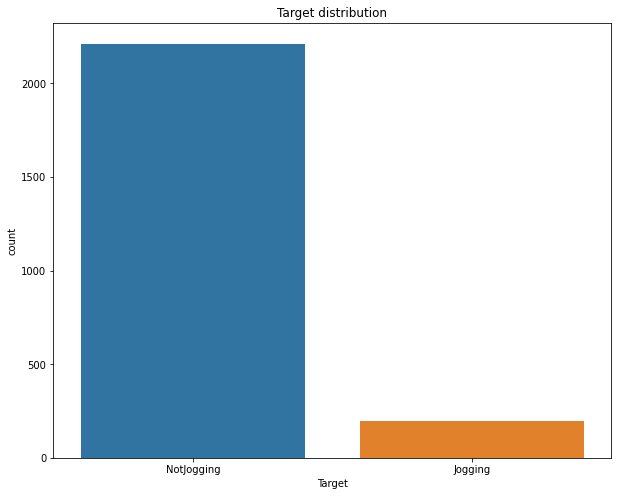

In [187]:
data.Target.value_counts(normalize=True).mul(100).rename("Jogging and NotJogging percentages") 
plt.figure(figsize=(10,8))
sns.countplot(data.Target)
plt.title("Target distribution")
plt.show()

In [188]:
col_names=print(data.columns.tolist())

['s2_mean', 'x_mean', 'y_mean', 'z_mean', 's2_variation', 'x_variation', 'y_variation', 'z_variation', 's2_std', 'x_std', 'y_std', 'z_std', 's2_median', 'x_median', 'y_median', 'z_median', 's2_max', 'x_max', 'y_max', 'z_max', 's2_min', 'x_min', 'y_min', 'z_min', 's2_skew', 'x_skew', 'y_skew', 'z_skew', 's2_kurtosis', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 's2_moment', 'x_moment', 'y_moment', 'z_moment', 's2_kstatvar', 'x_kstatvar', 'y_kstatvar', 'z_kstatvar', 's2_tvar', 'x_tvar', 'y_tvar', 'z_tvar', 's2_sem', 'x_sem', 'y_sem', 'z_sem', 's2_entropy', 'x_entropy', 'y_entropy', 'z_entropy', 's2_peak_len', 's2_peak_prom', 's2_peak_width', 's2_peak_height', 's2_weight_pred_k', 'x_peak_len', 'x_peak_prom', 'x_peak_width', 'x_peak_height', 'x_weight_pred_k', 'y_peak_len', 'y_peak_prom', 'y_peak_width', 'y_peak_height', 'y_weight_pred_k', 'z_peak_len', 'z_peak_prom', 'z_peak_width', 'z_peak_height', 'z_weight_pred_k', 's2_peak_len_50_110', 's2_peak_len_20_300', 'x_peak_len_20_150', 'x_peak_

In [189]:
# We make Kg variable into two categories, those weighting 75Kg and less and those weighting more than 75Kg
data["Kg"] = np.where(data["Kg"] <=75, 0, 1)
data["Kg"].value_counts()

0    1938
1     470
Name: Kg, dtype: int64

# **2. Feature Engineering and Data PreProcessing**

In [0]:
# FEATURE ENGINEERING

data["x_std_div_z_std"] = data["x_std"] / data["z_std"]
data["y_std_div_z_std"] = data["y_std"] / data["z_std"]

data["x_tvar_div_z_tvar"] = data["x_tvar"] / data["z_tvar"]
data["y_tvar_div_z_tvar"] = data["y_tvar"] / data["z_tvar"]
 
data["s2_peak_len_50_110_20_300_diff"] = abs(data["s2_peak_len_20_300"] - data["s2_peak_len_50_110"])
data["x_peak_prom_stand_diff_y"] = abs(data["x_peak_prom_stand"] - data["y_peak_prom_stand"])
data["x_peak_prom_sit_diff_y"] = abs(data["x_peak_prom_sit"] - data["y_peak_prom_sit"])
data["x_peak_len_diff_y"] = abs(data["x_peak_len"] - data["y_peak_len"])
data["s2_peak_prom_stand_sit_diff"] = abs(data["s2_peak_prom_stand"] - data["s2_peak_prom_sit"])
data["x_peak_len_diff_y_peak_len_50_200"] = abs(data["x_peak_len_50_200"] - data["y_peak_len_50_200"]) 
data["x_y_peak_len_20_150_diff_50_110"] = abs(data["x_peak_len_20_150"] - data["y_peak_len_50_110"])
data["s2_peak_len_50_110_20_300_diff"] = abs(data["s2_peak_len_20_300"] - data["s2_peak_len_50_110"])

data["z_peak_len_sq"] = np.square(data["z_peak_len"])
data["y_peak_len_sq"] = np.square(data["y_peak_len"])
data["y_z_peak_len_mul_squares"] = data["z_peak_len_sq"] * data ["y_peak_len_sq"]

data["s2_prom_div_height"] = (data["s2_peak_prom"] / data["s2_peak_height"]).fillna(0)
data["s2_prom_div_height"] = data["s2_prom_div_height"].replace([np.inf, -np.inf], 0)
data["x_prom_div_height"] = (data["x_peak_prom"] / data["x_peak_height"]).fillna(0)
data["x_prom_div_height"] = data["x_prom_div_height"].replace([np.inf, -np.inf], 0)
data["y_prom_div_height"] = (data["y_peak_prom"] / data["y_peak_height"]).fillna(0)
data["y_prom_div_height"] = data["y_prom_div_height"].replace([np.inf, -np.inf], 0)
data["z_prom_div_height"] = (data["z_peak_prom"] / data["z_peak_height"]).fillna(0)
data["z_prom_div_height"] = data["z_prom_div_height"].replace([np.inf, -np.inf], 0)


data["s2_entropy"] = np.where(data["s2_entropy"]==0, 0, 1)
data["x_entropy"] = np.where(data["x_entropy"]==0, 0, 1)
data["y_entropy"] = np.where(data["y_entropy"]==0, 0, 1)
data["z_entropy"] = np.where(data["z_entropy"]==0, 0, 1)


data["s2_kstatvar"] = np.sqrt(data["s2_kstatvar"])
data["x_kstatvar"] = np.sqrt(data["x_kstatvar"])
data["y_kstatvar"] = np.sqrt(data["y_kstatvar"])
data["z_kstatvar"] = np.sqrt(data["z_kstatvar"]) 

data["s2_peak_height_std"] = np.nanstd(np.where(np.isclose(data["s2_peak_height"],0), np.nan, data["s2_peak_height"]))
data["s2_variation_peak_height"] = (data["s2_peak_height_std"] / data["s2_peak_height"]).fillna(0)
data["s2_variation_peak_height"] = data["s2_variation_peak_height"].replace([np.inf, -np.inf], 0)
data["x_peak_height_std"] = np.nanstd(np.where(np.isclose(data["x_peak_height"],0), np.nan, data["x_peak_height"]))
data["x_variation_peak_height"] = (data["x_peak_height_std"] / data["x_peak_height"]).fillna(0)
data["x_variation_peak_height"] = data["x_variation_peak_height"].replace([np.inf, -np.inf], 0)
data["y_peak_height_std"] = np.nanstd(np.where(np.isclose(data["y_peak_height"],0), np.nan, data["y_peak_height"]))
data["y_variation_peak_height"] = (data["y_peak_height_std"] / data["y_peak_height"]).fillna(0)
data["y_variation_peak_height"] = data["y_variation_peak_height"].replace([np.inf, -np.inf], 0)
data["z_peak_height_std"] = np.nanstd(np.where(np.isclose(data["z_peak_height"],0), np.nan, data["z_peak_height"]))
data["z_variation_peak_height"] = (data["z_peak_height_std"] / data["z_peak_height"]).fillna(0)
data["z_variation_peak_height"] = data["z_variation_peak_height"].replace([np.inf, -np.inf], 0)

In [191]:
# Here I dropped the variables that were used during feature engineering
data = data.drop(["s2_max","x_max", "y_max", "z_max", "s2_min", "x_min", "y_min", "z_min", "y_mean","z_mean", "x_mean", "s2_mean", "y_moment","z_moment", "x_moment", "s2_moment", 
                  "x_variation", "s2_variation", "y_variation","z_variation", "s2_sem", "x_sem", "y_sem", "z_sem", "x_std", "y_std", "z_std", "s2_peak_prom_sit", "x_peak_prom_sit", "y_peak_prom_sit",   
                  "s2_peak_prom_stand", "x_peak_prom_stand", "y_peak_prom_stand", "x_peak_len_50_200", "y_peak_len_50_200", "x_peak_len_20_150", "y_peak_len_50_110", "s2_peak_len_50_110", "s2_peak_len_20_300", 
                  "x_peak_len", "y_peak_len", "z_peak_len", "s2_peak_height", "s2_peak_prom", "x_peak_height", "x_peak_prom", "y_peak_height", "y_peak_prom", "z_peak_height", "z_peak_prom",
                  "x_tvar", "y_tvar", "z_tvar"], axis=1)

data.head(2) 

,s2_std,s2_median,x_median,y_median,z_median,s2_skew,x_skew,y_skew,z_skew,s2_kurtosis,x_kurtosis,y_kurtosis,z_kurtosis,s2_kstatvar,x_kstatvar,y_kstatvar,z_kstatvar,s2_tvar,s2_entropy,x_entropy,y_entropy,z_entropy,s2_peak_len,s2_peak_width,s2_weight_pred_k,x_peak_width,x_weight_pred_k,y_peak_width,y_weight_pred_k,z_peak_width,z_weight_pred_k,x_y_corr,z_y_corr,x_z_corr,Name,Kg,Target,x_std_div_z_std,y_std_div_z_std,x_tvar_div_z_tvar,y_tvar_div_z_tvar,s2_peak_len_50_110_20_300_diff,x_peak_prom_stand_diff_y,x_peak_prom_sit_diff_y,x_peak_len_diff_y,s2_peak_prom_stand_sit_diff,x_peak_len_diff_y_peak_len_50_200,x_y_peak_len_20_150_diff_50_110,z_peak_len_sq,y_peak_len_sq,y_z_peak_len_mul_squares,s2_prom_div_height,x_prom_div_height,y_prom_div_height,z_prom_div_height,s2_peak_height_std,s2_variation_peak_height,x_peak_height_std,x_variation_peak_height,y_peak_height_std,y_variation_peak_height,z_peak_height_std,z_variation_peak_height
0,79.241526,45.0,95.0,-39.0,-958.0,1.266867,1.681872,-0.292822,-1.055814,0.733796,3.881072,7.540026,0.976598,368.047966,92483.490597,31507.126891,35945.836435,6287.078248,1,0,0,0,9,15.522306,2675.286822,9.847558,65043.90859,17.520812,80283.77067,0.000000,0.0,-0.810465,0.260219,-0.356973,a,1,NotJogging,1.352785,0.699616,1.830026,0.489463,0,5.383540,5.383540,0,0.068323,0,10,0,81,0,0.925287,1.427511,1.914871,0.00000,103.901322,0.298567,1697.301805,0.449855,421.304274,0.221390,1017.943133,0.00000
1,67.864297,39.0,81.0,-39.5,-954.0,1.124752,1.889477,-0.801476,-1.659979,0.541280,5.114008,8.709277,5.742951,369.040878,135065.550330,49367.164745,99430.488207,4617.105508,1,0,0,0,4,5.731959,5811.998158,9.904451,54081.94620,32.778207,153598.67940,15.677168,0.0,-0.752337,0.284737,-0.337889,a,1,NotJogging,1.190465,0.649720,1.417208,0.422137,0,6.363636,6.363636,0,0.028099,0,4,1,25,25,0.936533,1.480737,2.023419,21.11039,103.901322,0.321676,1697.301805,0.467062,421.304274,0.246665,1017.943133,6.61002


In [0]:
#Here I have changed the column names, to make sure every columns has the right one
data = data[['s2_median', 'x_median','y_median', 'z_median', 's2_std',  's2_skew', 'x_skew', 'y_skew', 'z_skew','s2_kurtosis', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 
             's2_kstatvar', 'x_kstatvar', 'y_kstatvar', 'z_kstatvar',  's2_peak_len', 's2_peak_width', 'x_peak_width', 'y_peak_width', 'z_peak_width',
             'x_y_corr', 'z_y_corr','x_z_corr', 's2_tvar', 's2_weight_pred_k', 'x_weight_pred_k', 'y_weight_pred_k', 'z_weight_pred_k', 'x_std_div_z_std', 'y_std_div_z_std', 
             'y_z_peak_len_mul_squares', 'x_peak_prom_stand_diff_y','x_peak_prom_sit_diff_y', 
             'x_peak_len_diff_y', 's2_peak_prom_stand_sit_diff','x_peak_len_diff_y_peak_len_50_200','x_y_peak_len_20_150_diff_50_110','s2_peak_len_50_110_20_300_diff',
             's2_entropy', 'x_entropy', 'y_entropy','z_entropy', 's2_prom_div_height', 'x_prom_div_height', 'y_prom_div_height', 'z_prom_div_height', 
             's2_variation_peak_height', 'x_variation_peak_height', 'y_variation_peak_height', 'z_variation_peak_height', 'x_tvar_div_z_tvar', 'y_tvar_div_z_tvar', 'Kg', 'Target', 'Name']]  

In [193]:
data["Target"] = np.where(data["Target"] == "Jogging", 1, 0)
data["Target"].value_counts()

0    2213
1     195
Name: Target, dtype: int64

In [194]:
# Here correlations between variables are checked
colnames = data.columns
col_len = len(colnames)
num = 0
while (num < (col_len-2)):  
  num1=num+1
  while (num1 < (col_len-2)):
    if (data.iloc[:,num].corr(data.iloc[:,num1]) > 0.8):
      print("Correlation between", data.columns[num], "and", data.columns[num1],":",data.iloc[:,num].corr(data.iloc[:,num1]).round(2))
      num1+=1
    else:
      num1 +=1
  num +=1
  num1=num+1

Correlation between s2_std and s2_kstatvar : 0.87
Correlation between s2_std and s2_tvar : 0.95
Correlation between s2_kstatvar and s2_tvar : 0.9
Correlation between x_std_div_z_std and x_tvar_div_z_tvar : 0.91
Correlation between y_std_div_z_std and y_tvar_div_z_tvar : 0.9
Correlation between x_peak_prom_stand_diff_y and x_peak_prom_sit_diff_y : 1.0
Correlation between z_prom_div_height and z_variation_peak_height : 0.91


In [0]:
# As correlation between x_peak_prom_stand_diff_y and x_peak_prom_sit_diff_y is 1.0, one of them has to be removed
data = data.drop(["x_peak_prom_sit_diff_y"], axis=1)

In [0]:
# Here I am dividing the dataset into dependent and independent variables
y = data["Target"]                       
x = data.drop(["Target", "Name"], axis=1)

# **3. Train Test split**

In [0]:
unique_name=data['Name'].unique()
np.random.seed(42)
random_names_train = np.random.choice(a = unique_name, size = 6, replace = False)  
train = pd.DataFrame()
for name in random_names_train:
  pre_train = data[data['Name'] == name] 
  train = train.append(pre_train)


y_train=train["Target"]
x_train=train.drop(["Target", "Name"],axis=1)


random_names_test = []
for letter in unique_name:
  if letter not in random_names_train:
    random_names_test.append(letter)

test = pd.DataFrame()
for names in random_names_test:
  pre_test = data[data['Name'] == names] 
  test = test.append(pre_test)


y_test=test["Target"]                       
x_test=test.drop(["Target", "Name"], axis=1)

# **4. Scaling: Normalization of the data**

In [0]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [0]:
x_train.columns = [['s2_median', 'x_median', 'y_median', 'z_median', 's2_std', 's2_skew', 'x_skew', 'y_skew', 'z_skew', 's2_kurtosis', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 
              's2_kstatvar', 'x_kstatvar', 'y_kstatvar', 'z_kstatvar', 's2_peak_len', 's2_peak_width', 'x_peak_width', 'y_peak_width', 'z_peak_width', 'x_y_corr', 'z_y_corr', 'x_z_corr',
              's2_tvar', 's2_weight_pred_k', 'x_weight_pred_k', 'y_weight_pred_k', 'z_weight_pred_k', 'x_std_div_z_std', 'y_std_div_z_std', 'y_z_peak_len_mul_squares',
              'x_peak_prom_stand_diff_y', 'x_peak_len_diff_y', 's2_peak_prom_stand_sit_diff', 'x_peak_len_diff_y_peak_len_50_200', 'x_y_peak_len_20_150_diff_50_110', 
              's2_peak_len_50_110_20_300_diff', 's2_entropy', 'x_entropy', 'y_entropy', 'z_entropy', 's2_prom_div_height', 'x_prom_div_height', 'y_prom_div_height', 
              'z_prom_div_height', 's2_variation_peak_height', 'x_variation_peak_height', 'y_variation_peak_height', 'z_variation_peak_height', 'x_tvar_div_z_tvar', 'y_tvar_div_z_tvar', 'Kg']]

x_test.columns = [['s2_median', 'x_median', 'y_median', 'z_median', 's2_std', 's2_skew', 'x_skew', 'y_skew', 'z_skew', 's2_kurtosis', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 
              's2_kstatvar', 'x_kstatvar', 'y_kstatvar', 'z_kstatvar', 's2_peak_len', 's2_peak_width', 'x_peak_width', 'y_peak_width', 'z_peak_width', 'x_y_corr', 'z_y_corr', 'x_z_corr',
              's2_tvar', 's2_weight_pred_k', 'x_weight_pred_k', 'y_weight_pred_k', 'z_weight_pred_k', 'x_std_div_z_std', 'y_std_div_z_std', 'y_z_peak_len_mul_squares',
              'x_peak_prom_stand_diff_y', 'x_peak_len_diff_y', 's2_peak_prom_stand_sit_diff', 'x_peak_len_diff_y_peak_len_50_200', 'x_y_peak_len_20_150_diff_50_110', 
              's2_peak_len_50_110_20_300_diff', 's2_entropy', 'x_entropy', 'y_entropy', 'z_entropy', 's2_prom_div_height', 'x_prom_div_height', 'y_prom_div_height', 
              'z_prom_div_height', 's2_variation_peak_height', 'x_variation_peak_height', 'y_variation_peak_height', 'z_variation_peak_height', 'x_tvar_div_z_tvar', 'y_tvar_div_z_tvar', 'Kg']]

In [0]:
# This is to match the indices of x_train, x_test, y_train, and y_test
y_test_index = y_test.index
x_test.index = y_test_index

y_train_index = y_train.index
x_train.index = y_train_index

# **5. Logistic Regression Models**

In [201]:
logit=LogisticRegression(random_state=42).fit(x_train,y_train)

y_train_logit = logit.predict(x_train)
y_test_logit = logit.predict(x_test) 

y_train_class = np.where(y_train_logit>0.5,1,0)
y_test_class = np.where(y_test_logit>0.5,1,0)

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_class)*100,accuracy_score(y_test,y_test_class)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_logit)*100,roc_auc_score(y_test,y_test_logit)*100],
                              "Recall":[recall_score(y_train, y_train_class)*100,recall_score(y_test, y_test_class)*100],
                              "Precision":[precision_score(y_train, y_train_class)*100,precision_score(y_test, y_test_class)*100],
                              "f1_score":[f1_score(y_train, y_train_class)*100,f1_score(y_test, y_test_class)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,100.000000,100.000000,100.000000,100.00000,100.000000
Testing set,97.087379,97.815009,98.666667,71.84466,83.146067


### **GridSearch on Log**

In [0]:
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,10,400),
            'penalty': ['l1','l2', "elasticnet"]}

In [203]:
gs_logit = GridSearchCV(estimator=logit,
                        param_grid=param_logit,
                        cv=5,scoring='precision',verbose=1,n_jobs=-1).fit(x_train, y_train)

gs_logit.best_params_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 6730 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  2.6min finished


{'C': 0.025162406015037594, 'class_weight': None, 'penalty': 'l2'}

### **Log model after GridSearch**

In [204]:
logit2=LogisticRegression(penalty="l2", class_weight=None, C=0.019, random_state=42).fit(x_train,y_train)

y_train_logit2=logit2.predict(x_train)
y_test_logit2=logit2.predict(x_test)

y_train_class2 = np.where(y_train_logit2>0.5,1,0)
y_test_class2 = np.where(y_test_logit2>0.5,1,0)


results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_class2)*100,accuracy_score(y_test,y_test_class2)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_logit2)*100,roc_auc_score(y_test,y_test_logit2)*100],
                              "Recall":[recall_score(y_train, y_train_class2)*100,recall_score(y_test, y_test_class2)*100],
                              "Precision":[precision_score(y_train, y_train_class2)*100,precision_score(y_test, y_test_class2)*100],
                              "f1_score":[f1_score(y_train, y_train_class2)*100,f1_score(y_test, y_test_class2)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,98.476052,92.003842,84.166667,98.058252,90.582960
Testing set,97.669903,91.986038,85.333333,83.116883,84.210526


#### **Finding the best threshold with Youden's index**

In [205]:
# Youden's index gives the most optimal threshold to maximize both recall and precision measures

fpr,tpr,thresholds = roc_curve(y_test,y_test_hat2)
optimal = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal]
print(optimal_threshold)

0.38365808104700455


#### **Log Models with Youden's index threshold**

In [207]:
logit3=LogisticRegression(penalty="l2", class_weight=None, C=0.019, random_state=42).fit(x_train,y_train)

y_train_logit3=logit3.predict(x_train)
y_test_logit3=logit3.predict(x_test)

y_train_class3 = np.where(y_train_logit3>0.38365808104700455,1,0)
y_test_class3 = np.where(y_test_logit3>0.38365808104700455,1,0)

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_class3)*100,accuracy_score(y_test,y_test_class3)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_logit3)*100,roc_auc_score(y_test,y_test_logit3)*100],
                              "Recall":[recall_score(y_train, y_train_class3)*100,recall_score(y_test, y_test_class3)*100],
                              "Precision":[precision_score(y_train, y_train_class3)*100,precision_score(y_test, y_test_class3)*100],
                              "f1_score":[f1_score(y_train, y_train_class3)*100,f1_score(y_test, y_test_class3)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,98.476052,92.003842,84.166667,98.058252,90.582960
Testing set,97.669903,91.986038,85.333333,83.116883,84.210526


# **6. Decision Tree**

In [208]:
tree_1 = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

y_train_dt1_proba = tree_1.predict_proba(x_train)[:,1]
y_test_dt1_proba = tree_1.predict_proba(x_test)[:,1]

y_train_dt1_class = np.where(y_train_dt1_proba>0.5,1,0)
y_test_dt1_class = np.where(y_test_dt1_proba>0.5,1,0)

print("Train ROC AUC of Decision Tree #1:", roc_auc_score(y_train,y_train_dt1_proba)*100)
print("Test ROC AUC of Decision Tree #1:", roc_auc_score(y_test, y_test_dt1_proba)*100)

print("Train Recall of Decision Tree #1:", recall_score(y_train, y_train_dt1_class)*100)
print("Test Recall of Decision Tree #1:", recall_score(y_test,y_test_dt1_class)*100)

print("Train Precision of Decision Tree #1:", precision_score(y_train, y_train_dt1_class)*100)
print("Test Precision of Decision Tree #1:", precision_score(y_test,y_test_dt1_class)*100)

Train ROC AUC of Decision Tree #1: 100.0
Test ROC AUC of Decision Tree #1: 65.24258289703316
Train Recall of Decision Tree #1: 100.0
Test Recall of Decision Tree #1: 49.333333333333336
Train Precision of Decision Tree #1: 100.0
Test Precision of Decision Tree #1: 17.050691244239633


### **GridSearch on Decision Tree**

In [0]:
param_dt={"max_depth":range(1,20),
          "min_samples_leaf":range(10,300,10),
          "class_weight":["balanced",None]        
            }

In [210]:
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt,
                  scoring="precision",cv=5).fit(x_train,y_train)

gs_dt.best_params_

{'class_weight': None, 'max_depth': 1, 'min_samples_leaf': 10}

### **Decision Tree after GridSearch**

In [211]:
tree_2 = DecisionTreeClassifier(class_weight=None,max_depth=1, min_samples_leaf=10, random_state=42).fit(x_train,y_train)

y_train_dt2_proba = tree_2.predict_proba(x_train)[:,1]
y_test_dt2_proba = tree_2.predict_proba(x_test)[:,1]

y_train_dt2_class = np.where(y_train_dt2_proba>0.5,1,0)
y_test_dt2_class = np.where(y_test_dt2_proba>0.5,1,0)

print("Train ROC AUC of Decision Tree #2:", roc_auc_score(y_train,y_train_dt2_proba)*100)
print("Test ROC AUC of Decision Tree #2:", roc_auc_score(y_test, y_test_dt2_proba)*100)

print("Train Recall of Decision Tree #2:", recall_score(y_train, y_train_dt2_class)*100)
print("Test Recall of Decision Tree #2:", recall_score(y_test,y_test_dt2_class)*100)

print("Train Precision of Decision Tree #2:", precision_score(y_train, y_train_dt2_class)*100)
print("Test Precision of Decision Tree #2:", precision_score(y_test,y_test_dt2_class)*100)

Train ROC AUC of Decision Tree #2: 85.29742978272391
Test ROC AUC of Decision Tree #2: 81.16230366492147
Train Recall of Decision Tree #2: 70.83333333333334
Test Recall of Decision Tree #2: 64.0
Train Precision of Decision Tree #2: 96.5909090909091
Test Precision of Decision Tree #2: 75.0


In [212]:
# As we can see, for Decision Tree "z_median" is the only important feature
feature_importances_dt = pd.DataFrame(tree_2.feature_importances_,index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dt

,importance
z_median,1.0
s2_median,0.0
y_entropy,0.0
x_std_div_z_std,0.0
y_std_div_z_std,0.0
y_z_peak_len_mul_squares,0.0
x_peak_prom_stand_diff_y,0.0
x_peak_len_diff_y,0.0
s2_peak_prom_stand_sit_diff,0.0
x_peak_len_diff_y_peak_len_50_200,0.0


In [213]:
print("Train:",classification_report(y_train,tree_2.predict(x_train)))
print("Test:",classification_report(y_test,tree_2.predict(x_test)))

Train:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1258
           1       0.97      0.71      0.82       120

    accuracy                           0.97      1378
   macro avg       0.97      0.85      0.90      1378
weighted avg       0.97      0.97      0.97      1378

Test:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       955
           1       0.75      0.64      0.69        75

    accuracy                           0.96      1030
   macro avg       0.86      0.81      0.83      1030
weighted avg       0.96      0.96      0.96      1030



# **6. Random Forest**

In [214]:
gs_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=param_dt, scoring="precision", cv=3, n_jobs=-1).fit(x_train,y_train)

gs_rf.best_params_

{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 10}

### **Random Forest after GridSearch**

In [215]:
rf=RandomForestClassifier(class_weight=None, max_depth=3, min_samples_leaf=10, random_state=42).fit(x_train,y_train)

y_train_rf_proba = rf.predict_proba(x_train)[:,1]
y_test_rf_proba = rf.predict_proba(x_test)[:,1]

y_train_rf_class = np.where(y_train_rf_proba>0.5,1,0)
y_test_rf_class = np.where(y_test_rf_proba>0.5,1,0)

print("Train ROC AUC of Random Forest #1:", roc_auc_score(y_train,y_train_rf_proba)*100)
print("Test ROC AUC of Random Forest #1:", roc_auc_score(y_test, y_test_rf_proba)*100)

print("Train Recall of Random Forest #1:", recall_score(y_train, y_train_rf_class)*100)
print("Test Recall of Random Forest #1:", recall_score(y_test,y_test_rf_class)*100)

print("Train Precision of Random Forest #1:", precision_score(y_train, y_train_rf_class)*100)
print("Test Precision of Random Forest #1:", precision_score(y_test,y_test_rf_class)*100)

Train ROC AUC of Random Forest #1: 99.97284048754636
Test ROC AUC of Random Forest #1: 99.80732984293195
Train Recall of Random Forest #1: 87.5
Test Recall of Random Forest #1: 93.33333333333333
Train Precision of Random Forest #1: 99.05660377358491
Test Precision of Random Forest #1: 93.33333333333333


In [216]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rf

,importance
x_kstatvar,0.221657
z_median,0.129030
s2_skew,0.095739
s2_kurtosis,0.070710
x_tvar_div_z_tvar,0.060027
x_std_div_z_std,0.059930
x_peak_prom_stand_diff_y,0.040178
z_kstatvar,0.039698
y_median,0.034039
y_kurtosis,0.030122


### **Comparison between the models (Logistic Regression, Descision Tree & Random Forest)**

In [217]:
# According to the results, RF performs the best among the three, as it has highest scores for recall, precision, and roc_auc
print("Mean 10-fold ROC_AUC score for Tuned Logit",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned DT",np.mean(cross_val_score(estimator=tree_2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned RF",np.mean(cross_val_score(estimator=rf,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc", n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned Logit",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned DT",np.mean(cross_val_score(estimator=tree_2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned RF",np.mean(cross_val_score(estimator=rf,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned Logit",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned DT",np.mean(cross_val_score(estimator=tree_2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned RF",np.mean(cross_val_score(estimator=rf,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)

Mean 10-fold ROC_AUC score for Tuned Logit 72.84461980437213
Mean 10-fold ROC_AUC score for Tuned DT 83.1496945862271
Mean 10-fold ROC_AUC score for Tuned RF 99.88206007865452
Mean 10-fold RECALL score for Tuned Logit 30.315789473684205
Mean 10-fold RECALL score for Tuned DT 67.15789473684211
Mean 10-fold RECALL score for Tuned RF 81.05263157894737
Mean 10-fold PRECISION score for Tuned Logit 50.621212121212125
Mean 10-fold PRECISION score for Tuned DT 87.12613122171946
Mean 10-fold PRECISION score for Tuned RF 99.41176470588235


##### **Dropping the features that are not important**

In [0]:
x_train_d = x_train.drop([ 'x_y_corr', 'y_std_div_z_std',	's2_median',	'y_tvar_div_z_tvar',	'z_y_corr', 'x_prom_div_height',	'x_variation_peak_height',	'z_kurtosis',	's2_peak_width',	'y_skew',	
                          's2_prom_div_height',	'z_entropy',	'y_weight_pred_k',	'x_z_corr', 'y_z_peak_len_mul_squares',	'x_peak_len_diff_y', 'x_weight_pred_k',	's2_weight_pred_k',	's2_peak_len',	
                          'z_prom_div_height',	'y_variation_peak_height',	'y_peak_width',	's2_variation_peak_height',	's2_peak_prom_stand_sit_diff','y_prom_div_height',	'x_peak_width',	
                          'x_peak_len_diff_y_peak_len_50_200',	'Kg',	'z_peak_width',	'z_variation_peak_height',	'z_weight_pred_k',	'y_entropy', 'x_entropy',	's2_entropy'], axis=1)
                         
x_test_d = x_test.drop([ 'x_y_corr', 'y_std_div_z_std',	's2_median',	'y_tvar_div_z_tvar',	'z_y_corr', 'x_prom_div_height',	'x_variation_peak_height',	'z_kurtosis',	's2_peak_width',	'y_skew',	
                          's2_prom_div_height',	'z_entropy',	'y_weight_pred_k',	'x_z_corr', 'y_z_peak_len_mul_squares',	'x_peak_len_diff_y', 'x_weight_pred_k',	's2_weight_pred_k',	's2_peak_len',	
                          'z_prom_div_height',	'y_variation_peak_height',	'y_peak_width',	's2_variation_peak_height',	's2_peak_prom_stand_sit_diff','y_prom_div_height',	'x_peak_width',	
                          'x_peak_len_diff_y_peak_len_50_200',	'Kg',	'z_peak_width',	'z_variation_peak_height',	'z_weight_pred_k',	'y_entropy', 'x_entropy',	's2_entropy'], axis=1)

##### **Building new models with new x_train and x_test**

##### **Logistic before and after GridSearch (with dropped variables)**

In [219]:
logit_d=LogisticRegression(random_state=42).fit(x_train_d,y_train)

y_traind_logit = logit_d.predict(x_train_d)
y_testd_logit = logit_d.predict(x_test_d) 

y_traind_class = np.where(y_traind_logit>0.5,1,0)
y_testd_class = np.where(y_testd_logit>0.5,1,0)


results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_traind_class)*100,accuracy_score(y_test,y_testd_class)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_traind_logit)*100,roc_auc_score(y_test,y_testd_logit)*100],
                              "Recall":[recall_score(y_train, y_traind_class)*100,recall_score(y_test, y_testd_class)*100],
                              "Precision":[precision_score(y_train, y_traind_class)*100,precision_score(y_test, y_testd_class)*100],
                              "f1_score":[f1_score(y_train, y_traind_class)*100,f1_score(y_test, y_testd_class)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,99.854862,99.543588,99.166667,99.166667,99.166667
Testing set,94.854369,95.996510,97.333333,58.870968,73.366834


In [0]:
param_logit_d={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,10,400),
            'penalty': ['l1','l2', "elasticnet"]}

In [221]:
gs_logit_d = GridSearchCV(estimator=logit_d,
                        param_grid=param_logit_d,
                        cv=5,scoring='precision',verbose=1,n_jobs=-1).fit(x_train_d, y_train)

gs_logit_d.best_params_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  2.0min finished


{'C': 0.05022481203007519, 'class_weight': None, 'penalty': 'l2'}

In [222]:
logit2_d=LogisticRegression(class_weight=None, penalty='l2', C=0.018, random_state=42).fit(x_train_d,y_train)

y_traind_logit2 = logit2_d.predict(x_train_d)
y_testd_logit2 = logit2_d.predict(x_test_d) 

y_traind_class2 = np.where(y_traind_logit2>0.5,1,0)
y_testd_class2 = np.where(y_testd_logit2>0.5,1,0)


results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_traind_class2)*100,accuracy_score(y_test,y_testd_class2)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_traind_logit2)*100,roc_auc_score(y_test,y_testd_logit2)*100],
                              "Recall":[recall_score(y_train, y_traind_class2)*100,recall_score(y_test, y_testd_class2)*100],
                              "Precision":[precision_score(y_train, y_traind_class2)*100,precision_score(y_test, y_testd_class2)*100],
                              "f1_score":[f1_score(y_train, y_traind_class2)*100,f1_score(y_test, y_testd_class2)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,98.040639,89.503842,79.166667,97.938144,87.557604
Testing set,98.155340,95.319372,92.000000,84.146341,87.898089


##### **Decision Tree before and after GridSearch (with dropped variables)**

In [223]:
tree_d= DecisionTreeClassifier(random_state=42).fit(x_train_d,y_train)

y_train_dt_probad = tree_d.predict_proba(x_train_d)[:,1]
y_test_dt_probad = tree_d.predict_proba(x_test_d)[:,1]

y_train_dt_classd = np.where(y_train_dt_probad>0.5,1,0)
y_test_dt_classd = np.where(y_test_dt_probad>0.5,1,0)

print("Train ROC AUC of Decision Tree:", roc_auc_score(y_train,y_train_dt_probad)*100)
print("Test ROC AUC of Decision Tree:", roc_auc_score(y_test, y_test_dt_probad)*100)

print("Train Recall of Decision Tree:", recall_score(y_train, y_train_dt_classd)*100)
print("Test Recall of Decision Tree:", recall_score(y_test,y_test_dt_classd)*100)

print("Train Precision of Decision Tree:", precision_score(y_train, y_train_dt_classd)*100)
print("Test Precision of Decision Tree:", precision_score(y_test,y_test_dt_classd)*100)

Train ROC AUC of Decision Tree: 100.0
Test ROC AUC of Decision Tree: 89.8324607329843
Train Recall of Decision Tree: 100.0
Test Recall of Decision Tree: 96.0
Train Precision of Decision Tree: 100.0
Test Precision of Decision Tree: 31.57894736842105


In [0]:
param_dt_d={"max_depth":range(1,20),
          "min_samples_leaf":range(10,300,10),
          "class_weight":["balanced",None]        
            }

In [225]:
gs_dt_d=GridSearchCV(estimator=tree_d, param_grid=param_dt_d,
                  scoring="precision",cv=5).fit(x_train_d,y_train)

gs_dt_d.best_params_

{'class_weight': None, 'max_depth': 1, 'min_samples_leaf': 10}

In [226]:
tree2_d = DecisionTreeClassifier(class_weight=None,max_depth=1, min_samples_leaf=10, random_state=42).fit(x_train_d,y_train)

y_train_dt2_probad = tree2_d.predict_proba(x_train_d)[:,1]
y_test_dt2_probad = tree2_d.predict_proba(x_test_d)[:,1]

y_train_dt2_classd = np.where(y_train_dt2_probad>0.5,1,0)
y_test_dt2_classd = np.where(y_test_dt2_probad>0.5,1,0)

print("Train ROC AUC of Decision Tree #2:", roc_auc_score(y_train,y_train_dt2_probad)*100)
print("Test ROC AUC of Decision Tree #2:", roc_auc_score(y_test, y_test_dt2_probad)*100)

print("Train Recall of Decision Tree #2:", recall_score(y_train, y_train_dt2_classd)*100)
print("Test Recall of Decision Tree #2:", recall_score(y_test,y_test_dt2_classd)*100)

print("Train Precision of Decision Tree #2:", precision_score(y_train, y_train_dt2_classd)*100)
print("Test Precision of Decision Tree #2:", precision_score(y_test,y_test_dt2_classd)*100)

Train ROC AUC of Decision Tree #2: 85.29742978272391
Test ROC AUC of Decision Tree #2: 81.16230366492147
Train Recall of Decision Tree #2: 70.83333333333334
Test Recall of Decision Tree #2: 64.0
Train Precision of Decision Tree #2: 96.5909090909091
Test Precision of Decision Tree #2: 75.0


##### **Random Forest after GridSearch(with dropped variables)**

In [227]:
gs_rf_d = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=param_dt_d, scoring="precision", cv=3, n_jobs=-1).fit(x_train_d,y_train)

gs_rf_d.best_params_

{'class_weight': None, 'max_depth': 1, 'min_samples_leaf': 50}

In [228]:
rf_d=RandomForestClassifier(class_weight=None, max_depth=3, min_samples_leaf=50, random_state=42).fit(x_train_d,y_train)

y_train_rf_probad = rf_d.predict_proba(x_train_d)[:,1]
y_test_rf_probad = rf_d.predict_proba(x_test_d)[:,1]

y_train_rf_classd = np.where(y_train_rf_probad>0.5,1,0)
y_test_rf_classd = np.where(y_test_rf_probad>0.5,1,0)

print("Train ROC AUC of Random Forest:", roc_auc_score(y_train,y_train_rf_probad)*100)
print("Test ROC AUC of Random Forest:", roc_auc_score(y_test, y_test_rf_probad)*100)

print("Train Recall of Random Forest:", recall_score(y_train, y_train_rf_classd)*100)
print("Test Recall of Random Forest:", recall_score(y_test,y_test_rf_classd)*100)

print("Train Precision of Random Forest:", precision_score(y_train, y_train_rf_classd)*100)
print("Test Precision of Random Forest:", precision_score(y_test,y_test_rf_classd)*100)

Train ROC AUC of Random Forest: 99.86354001059883
Test ROC AUC of Random Forest: 98.43769633507854
Train Recall of Random Forest: 78.33333333333333
Test Recall of Random Forest: 68.0
Train Precision of Random Forest: 98.94736842105263
Test Precision of Random Forest: 89.47368421052632


In [229]:
feature_importances_rfd = pd.DataFrame(rf_d.feature_importances_,index = x_train_d.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rfd

,importance
x_kstatvar,0.244640
z_median,0.239313
s2_kurtosis,0.103958
x_tvar_div_z_tvar,0.081413
s2_skew,0.066112
x_std_div_z_std,0.062932
y_kstatvar,0.033428
z_kstatvar,0.029661
s2_kstatvar,0.029180
x_peak_prom_stand_diff_y,0.024317


In [0]:
x_d = x.drop([ 'x_y_corr', 'y_std_div_z_std',	's2_median',	'y_tvar_div_z_tvar',	'z_y_corr', 'x_prom_div_height',	'x_variation_peak_height',	'z_kurtosis',	's2_peak_width',	'y_skew',	
                          's2_prom_div_height',	'z_entropy',	'y_weight_pred_k',	'x_z_corr', 'y_z_peak_len_mul_squares',	'x_peak_len_diff_y', 'x_weight_pred_k',	's2_weight_pred_k',	's2_peak_len',	
                          'z_prom_div_height',	'y_variation_peak_height',	'y_peak_width',	's2_variation_peak_height',	's2_peak_prom_stand_sit_diff','y_prom_div_height',	'x_peak_width',	
                          'x_peak_len_diff_y_peak_len_50_200',	'Kg',	'z_peak_width',	'z_variation_peak_height',	'z_weight_pred_k',	'y_entropy', 'x_entropy',	's2_entropy'], axis=1)

### **Comparison between the models with dropped variables (Logistic Regression, Descision Tree & Random Forest)**

In [231]:
print("Mean 10-fold ROC_AUC score for Tuned Logit with dropped variables",np.mean(cross_val_score(estimator=logit2_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned DT with dropped variables",np.mean(cross_val_score(estimator=tree2_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned RF with dropped variables",np.mean(cross_val_score(estimator=rf_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc", n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned Logit with dropped variables",np.mean(cross_val_score(estimator=logit2_d,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 19-fold RECALL score for Tuned DT with dropped variables",np.mean(cross_val_score(estimator=tree2_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned RF with dropped variables",np.mean(cross_val_score(estimator=rf_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned Logit with dropped variables",np.mean(cross_val_score(estimator=logit2_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned DT with dropped variables",np.mean(cross_val_score(estimator=tree2_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned RF with dropped variables",np.mean(cross_val_score(estimator=rf_d,X=x_d,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)

Mean 10-fold ROC_AUC score for Tuned Logit with dropped variables 90.5957124068579
Mean 10-fold ROC_AUC score for Tuned DT with dropped variables 83.1496945862271
Mean 10-fold ROC_AUC score for Tuned RF with dropped variables 99.4825108509319
Mean 10-fold RECALL score for Tuned Logit with dropped variables 29.815789473684205
Mean 19-fold RECALL score for Tuned DT with dropped variables 67.15789473684211
Mean 10-fold RECALL score for Tuned RF with dropped variables 80.07894736842105
Mean 10-fold PRECISION score for Tuned Logit with dropped variables 55.17889508899739
Mean 10-fold PRECISION score for Tuned DT with dropped variables 87.12613122171946
Mean 10-fold PRECISION score for Tuned RF with dropped variables 98.74509803921569


## **For the winning model**

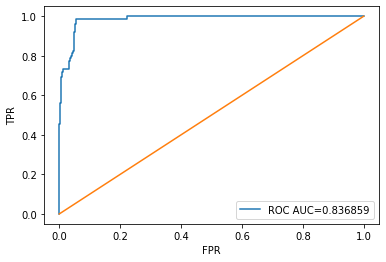

In [232]:
# ROC curve
fpr_1,tpr_1,thresholds_1=roc_curve(y_test,rf_d.predict_proba(x_test_d)[:,1])
plt.plot(fpr_1,tpr_1,label="ROC AUC=%f"%roc_auc_score(y_test,rf_d.predict(x_test_d)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

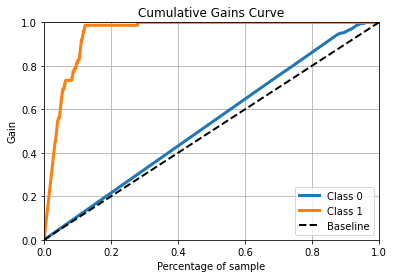

In [233]:
# Gain curve
skplt.metrics.plot_cumulative_gain(y_test,rf_d.predict_proba(x_test_d))

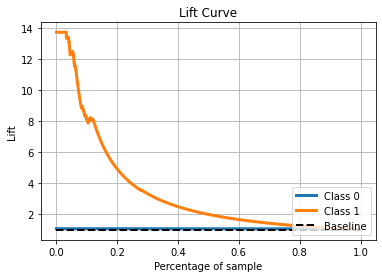

In [234]:
# Lift curve
skplt.metrics.plot_lift_curve(y_test,rf_d.predict_proba(x_test_d))

# **7. Other Models with Dropped Variables**

### **SVM**

In [235]:
# As we can see, without hyper parameter tuning, SVM works equal or even better the best model achieved with Random Forest

from sklearn import svm        # The packages are already installed in the beginning, for me it worked only if I run the code and packages installation simultaneously
from sklearn.svm import SVC

svm = svm.SVC(random_state=42).fit(x_train_d, y_train)

svc_pred_traind = svm.predict(x_train_d)
svc_pred_testd = svm.predict(x_test_d)

print("Train Accuracy of SVM:",accuracy_score(svc_pred_traind, y_train))
print("Test Accuracy of SVM:",accuracy_score(svc_pred_testd, y_test))

print("Train ROC AUC of SVM:", roc_auc_score(y_train,svc_pred_traind)*100)
print("Test ROC AUC of SVM:", roc_auc_score(y_test, svc_pred_testd)*100)

print("Train Recall of SVM:", recall_score(y_train, svc_pred_traind)*100)
print("Test Recall of SVM:", recall_score(y_test,svc_pred_testd)*100)

print("Train Precision of SVM:", precision_score(y_train, svc_pred_traind)*100)
print("Test Precision of SVM:", precision_score(y_test,svc_pred_testd)*100)

print("Train:", classification_report(svc_pred_traind, y_train))
print("Test:", classification_report(svc_pred_testd, y_test))

Train Accuracy of SVM: 0.9970972423802612
Test Accuracy of SVM: 0.987378640776699
Train ROC AUC of SVM: 98.33333333333334
Test ROC AUC of SVM: 98.09075043630018
Train Recall of SVM: 96.66666666666667
Test Recall of SVM: 97.33333333333334
Train Precision of SVM: 100.0
Test Precision of SVM: 86.90476190476191
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1262
           1       0.97      1.00      0.98       116

    accuracy                           1.00      1378
   macro avg       0.98      1.00      0.99      1378
weighted avg       1.00      1.00      1.00      1378

Test:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.97      0.87      0.92        84

    accuracy                           0.99      1030
   macro avg       0.98      0.93      0.96      1030
weighted avg       0.99      0.99      0.99      1030



In [236]:
svm_grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

gs_svm = GridSearchCV(estimator=svm,
                  param_grid=svm_grid_params, scoring="precision", cv=3, n_jobs=-1, verbose=1).fit(x_train,y_train)

gs_svm.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [252]:
# After GridSearch, with the suggested parameters and some manual tuning, we have achieved much better results for recall and precision
from sklearn import svm
from sklearn.svm import SVC

svm2_d = svm.SVC(C=10, gamma=0.001, kernel="rbf", random_state=42).fit(x_train_d, y_train)

svc2_pred_traind = svm2_d.predict(x_train_d)
svc2_pred_testd = svm2_d.predict(x_test_d)

print("Train Accuracy of SVM #2:",accuracy_score(svc2_pred_traind, y_train))
print("Test Accuracy of SVM #2:",accuracy_score(svc2_pred_testd, y_test))

print("Train ROC AUC of SVM #2:", roc_auc_score(y_train,svc2_pred_traind)*100)
print("Test ROC AUC of SVM #2:", roc_auc_score(y_test, svc2_pred_testd)*100)

print("Train Recall of SVM #2:", recall_score(y_train, svc2_pred_traind)*100)
print("Test Recall of SVM #2:", recall_score(y_test,svc2_pred_testd)*100)

print("Train Precision of SVM #2:", precision_score(y_train, svc2_pred_traind)*100)
print("Test Precision of SVM #2:", precision_score(y_test,svc2_pred_testd)*100)

print("Train:", classification_report(svc2_pred_traind, y_train))
print("Test:", classification_report(svc2_pred_testd, y_test))

Train Accuracy of SVM #2: 0.9963715529753265
Test Accuracy of SVM #2: 0.9699029126213592
Train ROC AUC of SVM #2: 98.29358770535241
Test ROC AUC of SVM #2: 97.14834205933683
Train Recall of SVM #2: 96.66666666666667
Test Recall of SVM #2: 97.33333333333334
Train Precision of SVM #2: 99.14529914529915
Test Precision of SVM #2: 71.56862745098039
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       0.97      0.99      0.98       117

    accuracy                           1.00      1378
   macro avg       0.98      0.99      0.99      1378
weighted avg       1.00      1.00      1.00      1378

Test:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.97      0.72      0.82       102

    accuracy                           0.97      1030
   macro avg       0.97      0.86      0.90      1030
weighted avg       0.97      0.97      0.9

### **KNN**

In [247]:
knn_d = KNeighborsClassifier(n_neighbors=5).fit(x_train_d,y_train)

knn_pred_traind = knn_d.predict(x_train_d)
knn_pred_testd = knn_d.predict(x_test_d)

print("Train Accuracy of KNN:", accuracy_score(knn_pred_traind, y_train))
print("Test Accuracy of KNN:",accuracy_score(knn_pred_testd, y_test))

print("Train ROC AUC of KNN:", roc_auc_score(y_train,knn_pred_traind)*100)
print("Test ROC AUC of KNN:", roc_auc_score(y_test, knn_pred_testd)*100)

print("Train Recall of KNN:", recall_score(y_train, knn_pred_traind)*100)
print("Test Recall of KNN:", recall_score(y_test,knn_pred_testd)*100)

print("Train Precision of KNN:", precision_score(y_train, knn_pred_traind)*100)
print("Test Precision of KNN:", precision_score(y_test,knn_pred_testd)*100)

print("Train:", classification_report(knn_pred_traind, y_train))
print("Test:", classification_report(knn_pred_testd, y_test))

Train Accuracy of KNN: 0.997822931785196
Test Accuracy of KNN: 0.9922330097087378
Train ROC AUC of KNN: 98.75
Test ROC AUC of KNN: 95.89528795811518
Train Recall of KNN: 97.5
Test Recall of KNN: 92.0
Train Precision of KNN: 100.0
Test Precision of KNN: 97.1830985915493
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       0.97      1.00      0.99       117

    accuracy                           1.00      1378
   macro avg       0.99      1.00      0.99      1378
weighted avg       1.00      1.00      1.00      1378

Test:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       959
           1       0.92      0.97      0.95        71

    accuracy                           0.99      1030
   macro avg       0.96      0.98      0.97      1030
weighted avg       0.99      0.99      0.99      1030



In [248]:
knn_grid_params = {"n_neighbors":range(1,20),
          "weights":["uniform","distance"],
          "metric":["euclidean","manhattan"]        
            }
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=knn_grid_params, scoring="precision", cv=3, n_jobs=-1, verbose=1).fit(x_train_d,y_train)

gs_knn.best_params_

Fitting 3 folds for each of 76 candidates, totalling 228 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    5.0s finished


{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}

In [249]:
knn2_d = KNeighborsClassifier(metric="euclidean", n_neighbors=1, weights="uniform").fit(x_train_d,y_train)

knn2_pred_traind = knn2_d.predict(x_train_d)
knn2_pred_testd = knn2_d.predict(x_test_d)

print("Train Accuracy of KNN#2:", accuracy_score(knn2_pred_traind, y_train))
print("Test Accuracy of KNN#2:",accuracy_score(knn2_pred_testd, y_test))

print("Train ROC AUC of KNN#2:", roc_auc_score(y_train,knn2_pred_traind)*100)
print("Test ROC AUC of KNN#2:", roc_auc_score(y_test, knn2_pred_testd)*100)

print("Train Recall of KNN#2:", recall_score(y_train, knn2_pred_traind)*100)
print("Test Recall of KNN#2:", recall_score(y_test,knn2_pred_testd)*100)

print("Train Precision of KNN#2:", precision_score(y_train, knn2_pred_traind)*100)
print("Test Precision of KNN#2:", precision_score(y_test,knn2_pred_testd)*100)

print("Train:", classification_report(knn2_pred_traind, y_train))
print("Test:", classification_report(knn2_pred_testd, y_test))

Train Accuracy of KNN#2: 1.0
Test Accuracy of KNN#2: 0.9864077669902913
Train ROC AUC of KNN#2: 100.0
Test ROC AUC of KNN#2: 95.58115183246073
Train Recall of KNN#2: 100.0
Test Recall of KNN#2: 92.0
Train Precision of KNN#2: 100.0
Test Precision of KNN#2: 89.6103896103896
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00       120

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378

Test:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       953
           1       0.92      0.90      0.91        77

    accuracy                           0.99      1030
   macro avg       0.96      0.94      0.95      1030
weighted avg       0.99      0.99      0.99      1030

